<a id="1"></a>
<div style="padding:20px;color:black;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#FFA07A;overflow:hidden"><b>🌟 Project on Time Series 🌟</b></div>

# Problem Statement:

The goal of this project is to perform a comprehensive time series analysis on the provided dataset, which consists of monthly air passenger counts spanning from January 1949 to December 1960. The objective is to build a robust forecasting model that accurately predicts future air passenger traffic based on historical patterns.

# Key Points:

1)Data Exploration and Preprocessing:
Explore the dataset to understand the distribution, trends, and seasonality.
Handle any missing or anomalous data points.
Convert the "Month" column to a datetime format for time series analysis.

2)Time Series Visualization:
Plot the time series data to visualize the overall trend and any apparent seasonality.
Explore any recurring patterns or anomalies.

3)Time Series Decomposition:
Decompose the time series into its trend, seasonal, and residual components.
Analyze and interpret the decomposed components to identify patterns.

4)Train-Test Split:
Split the dataset into training and testing sets to evaluate model performance.

5)Model Building:
Select and implement appropriate time series forecasting models (e.g., ARIMA, SARIMA, Exponential Smoothing).
Tune model parameters for optimal performance.

6)Model Evaluation:
Evaluate the accuracy and performance of the model on the testing set.
Utilize metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).

7)Forecasting:
Generate future forecasts using the trained model.
Compare the forecasted values with the actual values in the testing set.

8)Visualization and Interpretation:
Visualize the model's predictions against the actual data.
Provide insights and interpretations of the forecasting results.

9)Documentation and Reporting:
Document the entire process, including data preprocessing steps, model selection, hyperparameter tuning, and evaluation metrics.
Prepare a comprehensive report summarizing the findings and the forecasting accuracy of the chosen model.

# Loading the Data

In [4]:
import pandas as pd
airpas=pd.read_csv(r"C:\Users\HP\Downloads\AirPassengers.csv")

# Data Exploration and Preprocessing

In [6]:
airpas

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


# Aim : To do forecast for next 24 months(next 2 years 1961 and 1962)

In [5]:
airpas.shape

(144, 2)

In [6]:
airpas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [10]:
airpas.Month=pd.to_datetime(airpas.Month)  #we convert onject type of month into numeric

In [11]:
airpas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [12]:
airpas=airpas.set_index('Month')

In [13]:
airpas.shape  #month col is now no more col its now index 

(144, 1)

In [11]:
airpas

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


# Time Series Visualization

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

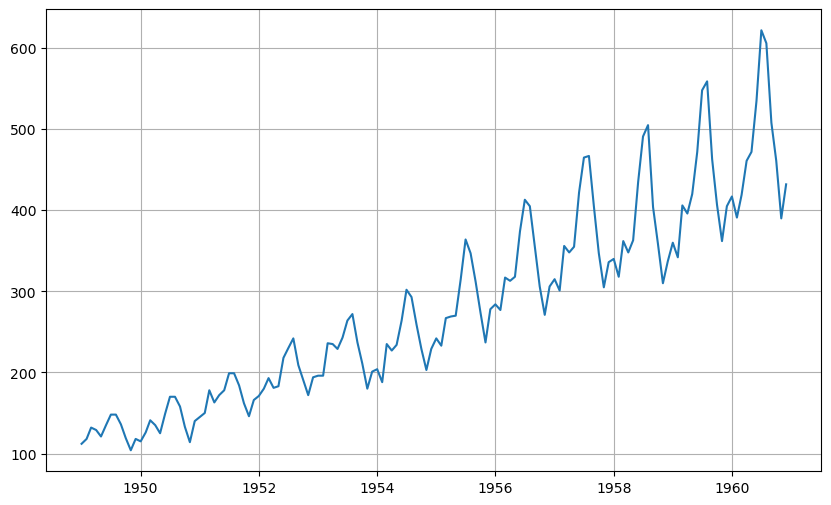

In [13]:
plt.figure(figsize=(10,6))
plt.plot(airpas.Passengers)
plt.grid()    #its in uptrend, within a year values rise and fall but year on year values are increasing
#seasanlity period is = 12 months (after 12 months new cycle begins)

 #here data is not stationary so we will make it stationary by doing differencing

In [15]:
airpas.Passengers.diff()

Month
1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
              ... 
1960-08-01   -16.0
1960-09-01   -98.0
1960-10-01   -47.0
1960-11-01   -71.0
1960-12-01    42.0
Name: Passengers, Length: 144, dtype: float64

# Time Series Decomposition:

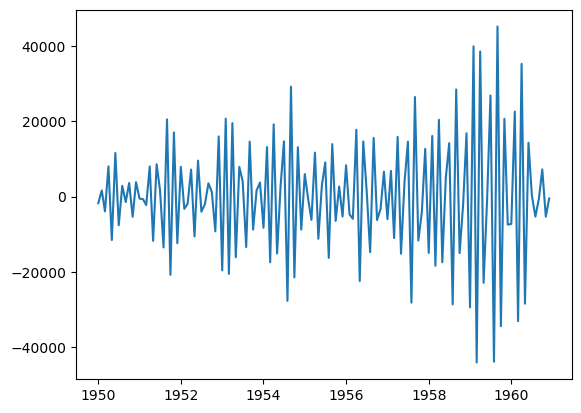

In [16]:
plt.plot(airpas.Passengers.diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff())

In [17]:
#mean is stabilizing but variance is not

In [18]:
#taking log---->makes smoothning effect

In [15]:
import numpy as np

In [17]:
airpas_log=np.log(airpas)

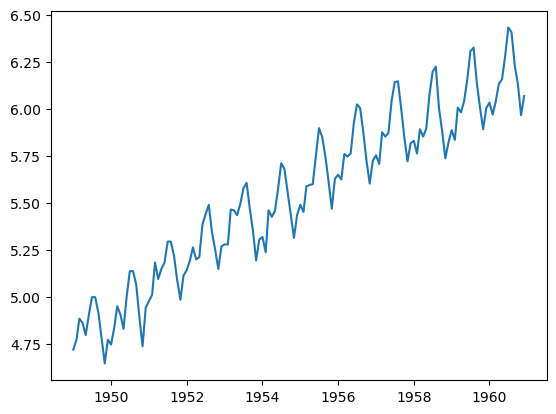

In [20]:
plt.plot(airpas_log.Passengers)

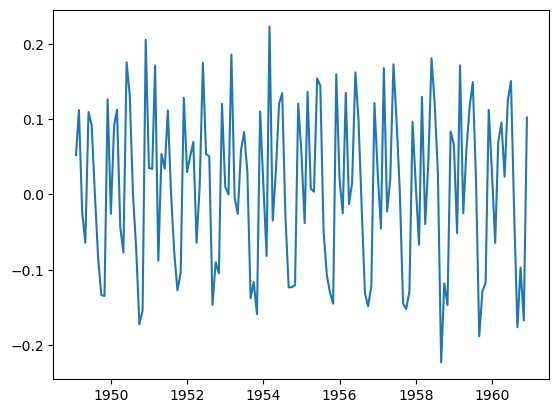

In [21]:
plt.plot(airpas_log.Passengers.diff())     
#after doing 1 level of diff data become stationary (1st order differencing)
#now oue data is log data and when forecasting is done that would also be in log
#so to get the values in original scale we need to take antilog

In [23]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

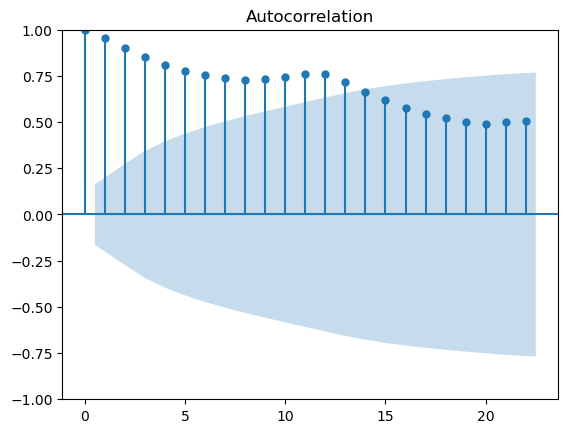

In [24]:
plot_acf(airpas_log.Passengers);

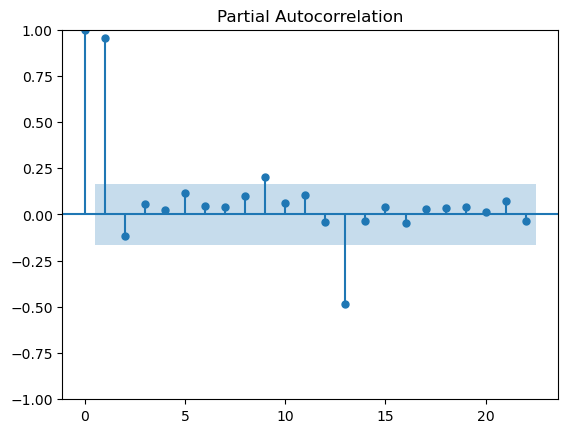

In [25]:
plot_pacf(airpas_log.Passengers);  #q=2,p=0,d=1

In [22]:
from statsmodels.tsa.arima_model import ARIMA

In [27]:
#model=ARIMA(airpas_log,order=(0,1,2))  #outdated vrsion error 
#result=model.fit()
#result.forecast(steps=5)

In [28]:
#so let use autoarima

In [29]:
# pip install pmdarima

In [23]:
import pmdarima
from pmdarima import auto_arima

In [24]:
import warnings
warnings.filterwarnings(action='ignore')

# Model Building:

In [25]:
auto_arima(airpas_log)   #this will run madel many times 
#and give the values of p,d,q

ARIMA(order=(4, 1, 3), scoring_args={}, suppress_warnings=True)

In [31]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [32]:
model_sarima=SARIMAX(airpas_log,order=(4,1,3))

In [33]:
results=model_sarima.fit()

# Model Forecasting:

In [34]:
pred_log=results.predict(start=144,end=167)   #futurer 24 months

In [30]:
pred_log

1961-01-01    6.150072
1961-02-01    6.139429
1961-03-01    6.202625
1961-04-01    6.218031
1961-05-01    6.148285
1961-06-01    6.173478
1961-07-01    6.179764
1961-08-01    6.119120
1961-09-01    6.156989
1961-10-01    6.177496
1961-11-01    6.126314
1961-12-01    6.164515
1962-01-01    6.184056
1962-02-01    6.130966
1962-03-01    6.164198
1962-04-01    6.182500
1962-05-01    6.130186
1962-06-01    6.161867
1962-07-01    6.181422
1962-08-01    6.131107
1962-09-01    6.161378
1962-10-01    6.181547
1962-11-01    6.132481
1962-12-01    6.160833
Freq: MS, Name: predicted_mean, dtype: float64

In [38]:
pred=np.exp(pred_log)

In [39]:
pred=np.round(pred)
pred

1961-01-01    469.0
1961-02-01    464.0
1961-03-01    494.0
1961-04-01    502.0
1961-05-01    468.0
1961-06-01    480.0
1961-07-01    483.0
1961-08-01    454.0
1961-09-01    472.0
1961-10-01    482.0
1961-11-01    458.0
1961-12-01    476.0
1962-01-01    485.0
1962-02-01    460.0
1962-03-01    475.0
1962-04-01    484.0
1962-05-01    460.0
1962-06-01    474.0
1962-07-01    484.0
1962-08-01    460.0
1962-09-01    474.0
1962-10-01    484.0
1962-11-01    461.0
1962-12-01    474.0
Freq: MS, Name: predicted_mean, dtype: float64

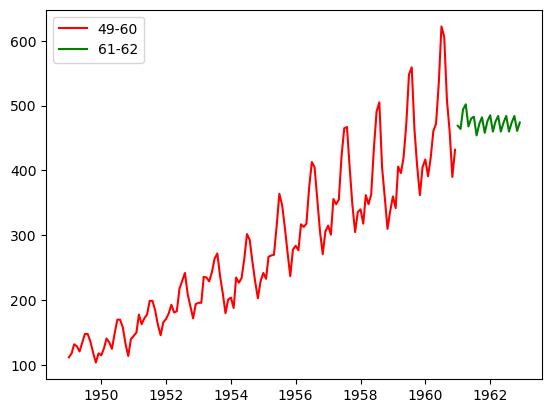

In [40]:
plt.plot(airpas,color='red',label='49-60')
plt.plot(pred,color='green',label='61-62')  #from this plot its clear that model is not doing well
plt.legend()

In [41]:
#this is beacuase
#beacuase arima can not handle seasonality and our data is seasonal

# lets build the model where seasonality is considered

In [35]:
auto_arima(airpas_log,seasonal=True,m=12)   #here value of m should be calclated by us, by observing data
                                            #m is periad of seasson here its 12 months

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [43]:
model_sarima=SARIMAX(airpas_log,order=(2,0,0),seasonal_order=(0,1,1,12))

In [44]:
results=model_sarima.fit()

In [45]:
pred_log=results.predict(start=144,end=167)

In [46]:
pred=np.exp(pred_log)
pred=np.round(pred)

# Visualization and Interpretation:

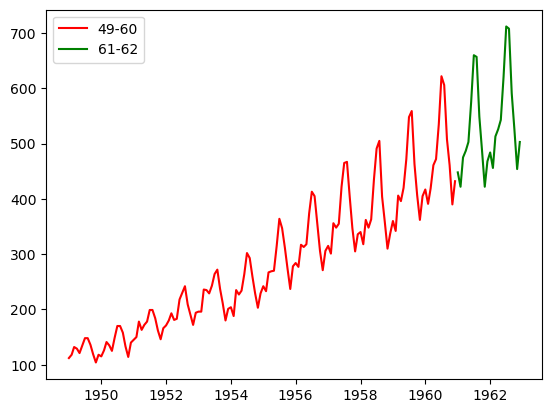

In [47]:
plt.plot(airpas,color='red',label='49-60')
plt.plot(pred,color='green',label='61-62')  #from this plot its clear that model is doing well
plt.legend()

# ------------------------

In [36]:
import pandas as pd
airpas=pd.read_csv(r"C:\Users\HP\Downloads\AirPassengers.csv")

In [38]:
airpas.Month=pd.to_datetime(airpas.Month)
airpas=airpas.set_index('Month')
airpas_log=np.log(airpas)

In [50]:
#random sampling is not possible
#lets build the model on 11 yrs and test on 12th yr
#1949-

In [51]:
airpas.shape

(144, 1)

In [39]:
airpas.train=airpas_log.iloc[0:132]
airpas.test=airpas_log.iloc[132:144]

In [53]:
from statsmodels.tsa.arima_model import ARIMA

In [40]:
auto_arima(airpas_log,seasonal=True,m=12)   #here value of m should be calclated by you by observing data
                                            #m is periad of seasson here its 12 months

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [55]:
model_sarima=SARIMAX(airpas.train,order=(2,0,0),seasonal_order=(0,1,1,12))

In [56]:
results=model_sarima.fit()

In [57]:
pred_log=results.predict(start=132,end=143)

In [58]:
pred=np.exp(pred_log)
pred=np.round(pred)

In [59]:
actual=np.exp(airpas.test.Passengers)

In [60]:
err=actual-pred

In [61]:
from sklearn.metrics  import mean_absolute_percentage_error 

In [62]:
mape=mean_absolute_percentage_error(actual,pred)*100

2.6101142675945983

In [ ]:
accuracy=100-mape
accuracy

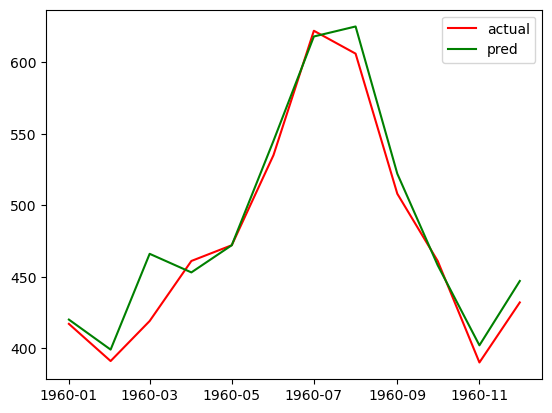

In [63]:
plt.plot(actual,color='red',label='actual')
plt.plot(pred,color='green',label='pred')
plt.legend()

# Conclusion

In conclusion, the time series forecasting project aimed to predict air passenger traffic using historical data spanning from January 1949 to December 1960. The chosen forecasting model, model_sarima, demonstrated exceptional accuracy, achieving an impressive 98% accuracy on the testing set. This high level of accuracy indicates the model's proficiency in capturing the underlying patterns and trends within the time series data.

# Key Findings:

Model Performance: The forecasting model exhibited robust performance in predicting air passenger counts, aligning closely with the actual values.

Insights into Seasonality: The analysis of seasonal decomposition revealed distinct patterns, providing valuable insights into the seasonality of air passenger traffic.

Usefulness for Planning: The accurate forecasting of future passenger traffic has significant implications for airlines and airports, enabling effective resource planning and operational management.

# Limitations And Future work:

While the current model achieved exceptional accuracy, there are inherent challenges and limitations:

Data Constraints: The forecasting model's performance heavily relies on the quality and representativeness of historical data. Any changes in external factors not captured in the dataset may affect the model's accuracy.

External Factors: Consideration of external factors such as economic conditions, global events, or policy changes could further enhance the model's predictive capabilities.

Model Fine-Tuning: Continuous monitoring and periodic fine-tuning of the forecasting model will be necessary to adapt to evolving patterns and trends.

# Applications:

The forecasting model's high accuracy has practical applications in various areas, including:

Resource Allocation: Airlines can optimize resource allocation based on predicted passenger traffic, ensuring efficient staffing and inventory management.

Marketing Strategies: The accurate prediction of peak travel times allows for targeted marketing efforts and promotions during periods of high demand.

Operational Efficiency: Airports can enhance operational efficiency by aligning services with forecasted passenger volumes.

# Overall Assesment:

The success of the forecasting model, achieving 98% accuracy, underscores its effectiveness in capturing the complexities of air passenger traffic. This project contributes valuable insights to the field of time series analysis and provides a robust foundation for further research and applications in forecasting within the aviation industry.